In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


In [ ]:
data=data.drop(['Time'],axis=1)

In [ ]:
X=data[data.drop('Class',axis=1).columns]
y=data['Class' ]

In [ ]:
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV






In [ ]:
xtr, xt, ytr, yt = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
df=pd.concat([xtr,ytr],axis=1)

In [ ]:
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]

In [ ]:
from sklearn.utils import resample
class0 = resample(class_0,replace=False,n_samples=10000,random_state=42)

In [ ]:
xtr=pd.concat([class0,class_1],axis=0,ignore_index=True)

In [ ]:
ytr=xtr['Class']
xtr=xtr.drop('Class',axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE
xtr,ytr=SMOTE().fit_resample(xtr,ytr)

In [ ]:
# from sklearn.cluster import KMeans
# import numpy as np

# # Number of samples to extract
# n = 1000

# kmeans_class_0 = KMeans(n_clusters=n, random_state=42)
# # Fit KMeans to data without the 'Class' column
# kmeans_class_0.fit(class_0.drop(columns=['Class'])) # Drop 'Class' column before fitting
# class_0['cluster'] = kmeans_class_0.labels_


# def max_var(data, center):
#     # Ensure data and center have the same dimensions
#     dists = np.linalg.norm(data - center, axis=1)
#     max_point = data.iloc[dists.argmax()]
#     return max_point

# max_points = []

# for lbl in range(n):
#     cluster_data = class_0[class_0['cluster'] == lbl].drop(columns=['cluster', 'Class']) # Drop 'cluster' and 'Class'
#     center = kmeans_class_0.cluster_centers_[lbl]
#     max_points.append(max_var(cluster_data, center))

# bal_X = pd.DataFrame(max_points).reset_index(drop=True)

# print("Shape of bal_X:", bal_X.shape)

In [ ]:
# bal_X.drop('Class',axis=1,inplace=True)

In [ ]:
# class_1.drop('Class',axis=1,inplace=True)

In [ ]:
# print("Shape of bal_X:", bal_X.shape)

In [ ]:
# # Separate data points for each class
# class_0 = data[data['Class'] == 0]
# class_1 = data[data['Class'] == 1]

# # Sample 500 data points from each class
# class_0_sampled = class_0.sample(n=492, random_state=42)
# class_1_sampled = class_1.sample(n=492, random_state=42)

# # Combine the sampled data points
# reduced_data = pd.concat([class_0_sampled, class_1_sampled])


In [ ]:
# xtr=pd.concat([class_1,bal_X],axis=0,ignore_index=True)
# ytr=pd.concat([pd.Series(np.zeros(len(bal_X))),pd.Series(np.ones(len(class_1)))],axis=0)

In [ ]:
# # Proceed with splitting and training
# X = reduced_data.drop('Class', axis=1)
# y = reduced_data['Class']



In [ ]:
xtr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.617028,-3.115011,0.685376,0.198444,1.184559,-2.525429,-1.968383,0.711382,1.316460,-1.252802,...,0.719499,0.526440,0.440286,0.113601,0.638645,-0.700953,-0.720452,0.129882,-0.498381,10.000000
1,-0.051645,-2.544787,1.126139,1.147835,-2.275146,0.448899,-0.416517,0.232559,1.741104,-0.801488,...,0.994566,0.306990,-0.038308,-0.429777,0.719803,-0.159799,1.039575,-0.101276,0.120115,595.760000
2,-1.052998,0.425369,-1.187392,-0.508878,2.061990,0.950960,0.343668,0.670876,0.312413,-0.894087,...,-0.310938,0.276621,1.278619,0.286261,-2.483598,-0.550057,0.036548,0.187174,-0.069097,8.180000
3,-0.747672,0.308424,2.282280,0.550129,-2.251742,1.306888,1.409881,-0.280515,0.453351,-0.407185,...,0.062336,-0.230413,0.000705,-0.074975,0.524661,-0.311055,1.193226,-0.152259,-0.263621,333.050000
4,-0.916487,1.207840,-0.513035,-1.227918,2.053415,3.323461,-0.207330,1.368472,-0.502626,-0.172838,...,0.235268,-0.271038,-0.935668,0.012640,0.978728,0.040667,0.093648,0.252214,0.109035,11.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.478732,1.234686,-5.611362,5.841975,3.428655,-2.816614,-1.531572,0.750811,-3.129945,-3.513318,...,0.809805,0.350392,-0.842089,-0.036460,0.018600,-0.570984,0.003806,0.427073,-0.032357,0.000000
19996,-1.336714,1.366802,-1.564482,0.634207,-0.087367,1.006813,-2.963731,-2.445057,1.152708,-3.716076,...,0.462194,-0.104611,0.779315,-0.267056,-0.379381,0.214164,-0.107024,0.317702,0.061765,39.267967
19997,-1.713174,2.114115,-1.662005,2.607487,-0.894464,-1.570597,-2.164013,1.094449,-2.328022,-3.421655,...,0.171852,0.541231,0.076351,-0.214663,0.406073,-0.101575,0.247195,0.374852,0.075057,0.421781
19998,-4.697033,3.521861,-5.296648,4.003956,-3.273296,-0.940760,-5.726917,0.940591,-2.248068,-5.617671,...,-0.339064,2.461536,0.034142,0.389009,-0.127152,-0.350592,-0.255466,-0.342939,0.018538,1.012236


In [ ]:
model = SVC()

In [ ]:
# model.fit(xtr,ytr)

In [ ]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(xtr, ytr)

In [ ]:
#predictions
y_pred_svm = model2.predict(xt)

In [ ]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(yt, y_pred_svm))
print("Precision SVM:",metrics.precision_score(yt, y_pred_svm))
print("Recall SVM:",metrics.recall_score(yt, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(yt, y_pred_svm))

cm_adjusted = confusion_matrix(yt, y_pred_svm)
print("Adjusted Confusion Matrix:")
print(cm_adjusted)

Accuracy SVM: 0.96045197740113
Precision SVM: 0.03697916666666667
Recall SVM: 0.8819875776397516
F1 Score SVM: 0.0709822544363909
Adjusted Confusion Matrix:
[[90128  3698]
 [   19   142]]


In [ ]:
y_pred_svm_proba = model2.predict_proba(xt)[::,1]
y_pred_svm_proba

array([0.06065778, 0.03541377, 0.82003196, ..., 0.51444903, 0.04045827,
       0.03790826])

In [ ]:
# from sklearn.metrics import confusion_matrix

# # ... (Your existing code for model training and prediction, including y_scores) ...

# # Adjusting the Decision Threshold
# adjusted_threshold = -0.5  # Experiment with different values
# y_pred_adjusted = (y_scores > adjusted_threshold)

# # Confusion Matrix with Adjusted Predictions
# cm_adjusted = confusion_matrix(yt, y_pred_adjusted)

# print("Adjusted Confusion Matrix:")
# print(cm_adjusted)

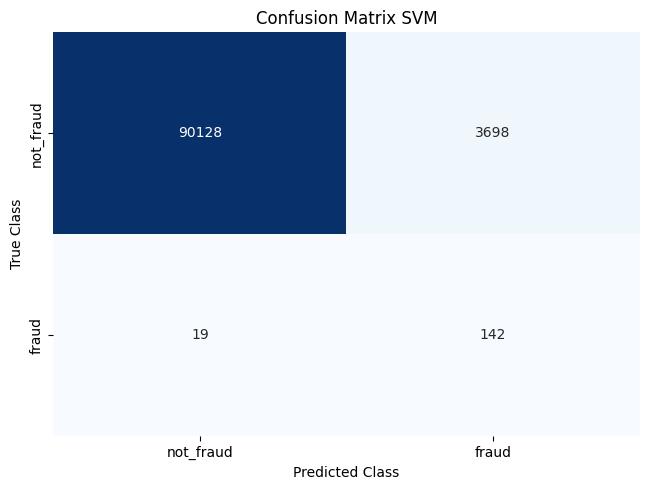

In [ ]:
#CM matrix
matrix_svm = confusion_matrix(yt, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")

plt.show()

In [ ]:
# # !pip install seaborn

# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # ... (Your existing code for model training and prediction, including y_scores) ...

# # Adjusting the Decision Threshold
# adjusted_threshold = -0.5 # Experiment with different values
# y_pred_adjusted = (y_scores > adjusted_threshold)

# # Confusion Matrix with Adjusted Predictions
# cm_adjusted = confusion_matrix(yt, y_pred_adjusted)

# # Heatmap
# sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues",
#             xticklabels=["Not Fraud", "Fraud"],
#             yticklabels=["Not Fraud", "Fraud"])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Adjusted Confusion Matrix Heatmap")
# plt.show()

In [ ]:
#AUC
y_pred_svm_proba = model2.predict_proba(xt)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(yt,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(yt, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9726856624916772


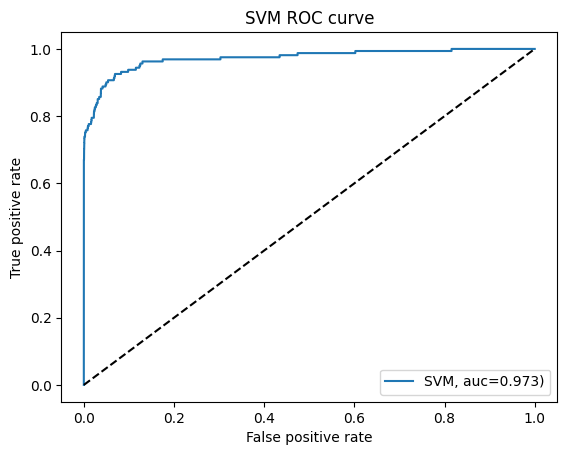

In [ ]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

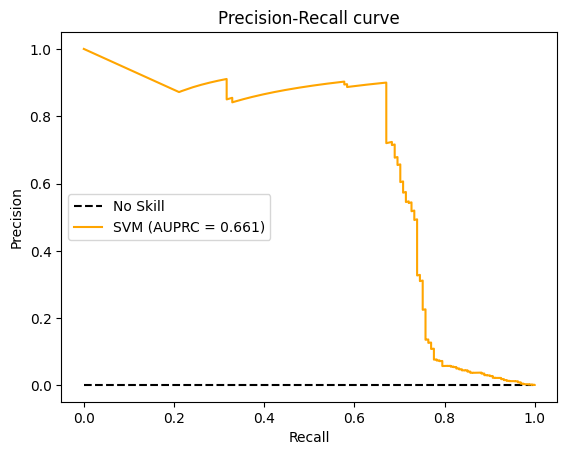

In [ ]:
from sklearn.metrics import auc


# Calculate AUPRC
svm_precision, svm_recall, _ = precision_recall_curve(yt, y_pred_svm_proba)
auprc_svm = auc(svm_recall, svm_precision)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label=f'SVM (AUPRC = {auprc_svm:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()